In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
signals=np.load("/its/home/drs25/Quadruped/Code/UBERMODEL/X_DATA_longer.npy")
#samples=signals[:6,:,:12]
dt=0.1
random_indicies=[np.random.randint(0,len(signals)-1) for i in range(6)]

ValueError: cannot reshape array of size 739717616 into shape (26034,2499,23)

In [3]:
random_indicies

[12839, 11603, 10052, 14213, 13612, 9036]

## Signals

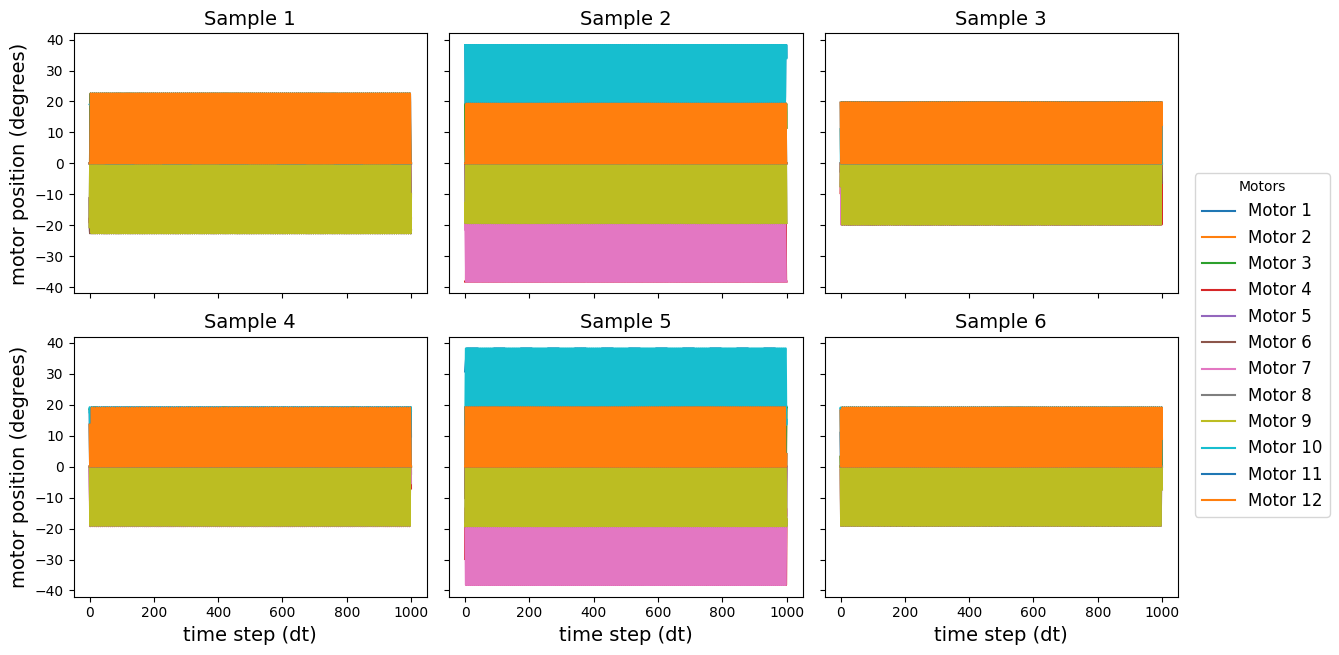

In [194]:
samples=signals[random_indicies,:,:12]
num_samples, timesteps, num_motors = samples.shape

time = np.arange(timesteps) * dt

fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=True, sharey=True)

# To store line handles for legend (only need to collect once)
legend_handles = []

for idx in range(num_samples):
    ax = axes.flatten()[idx]

    # Plot all 12 motors
    for m in range(num_motors):
        line, = ax.plot(time, samples[idx, :, m], label=f"Motor {m+1}")

        # Save handles from the first subplot only
        if idx == 0:
            legend_handles.append(line)

    ax.set_title(f"Sample {idx+1}",fontsize=14)

    row = idx // 3
    col = idx % 3

    # Y labels only for left column
    if col == 0:
        ax.set_ylabel("motor position (degrees)",fontsize=14)
    else:
        ax.tick_params(labelleft=False)

    # X labels only for bottom row
    if row == 1:
        ax.set_xlabel("time step (dt)",fontsize=14)
    else:
        ax.tick_params(labelbottom=False)

# Add legend to the right of the whole figure
fig.legend(
    handles=legend_handles,
    labels=[f"Motor {i+1}" for i in range(num_motors)],
    loc="center left",
    bbox_to_anchor=(0.85, 0.5),
    borderaxespad=0.0,
    title="Motors",fontsize=12
)

plt.tight_layout(rect=[0.05, 0.05, 0.85, 1])  # leave space for legend
plt.savefig("/its/home/drs25/Quadruped/assets/plots/motors_sample.png")
plt.show()

### feet

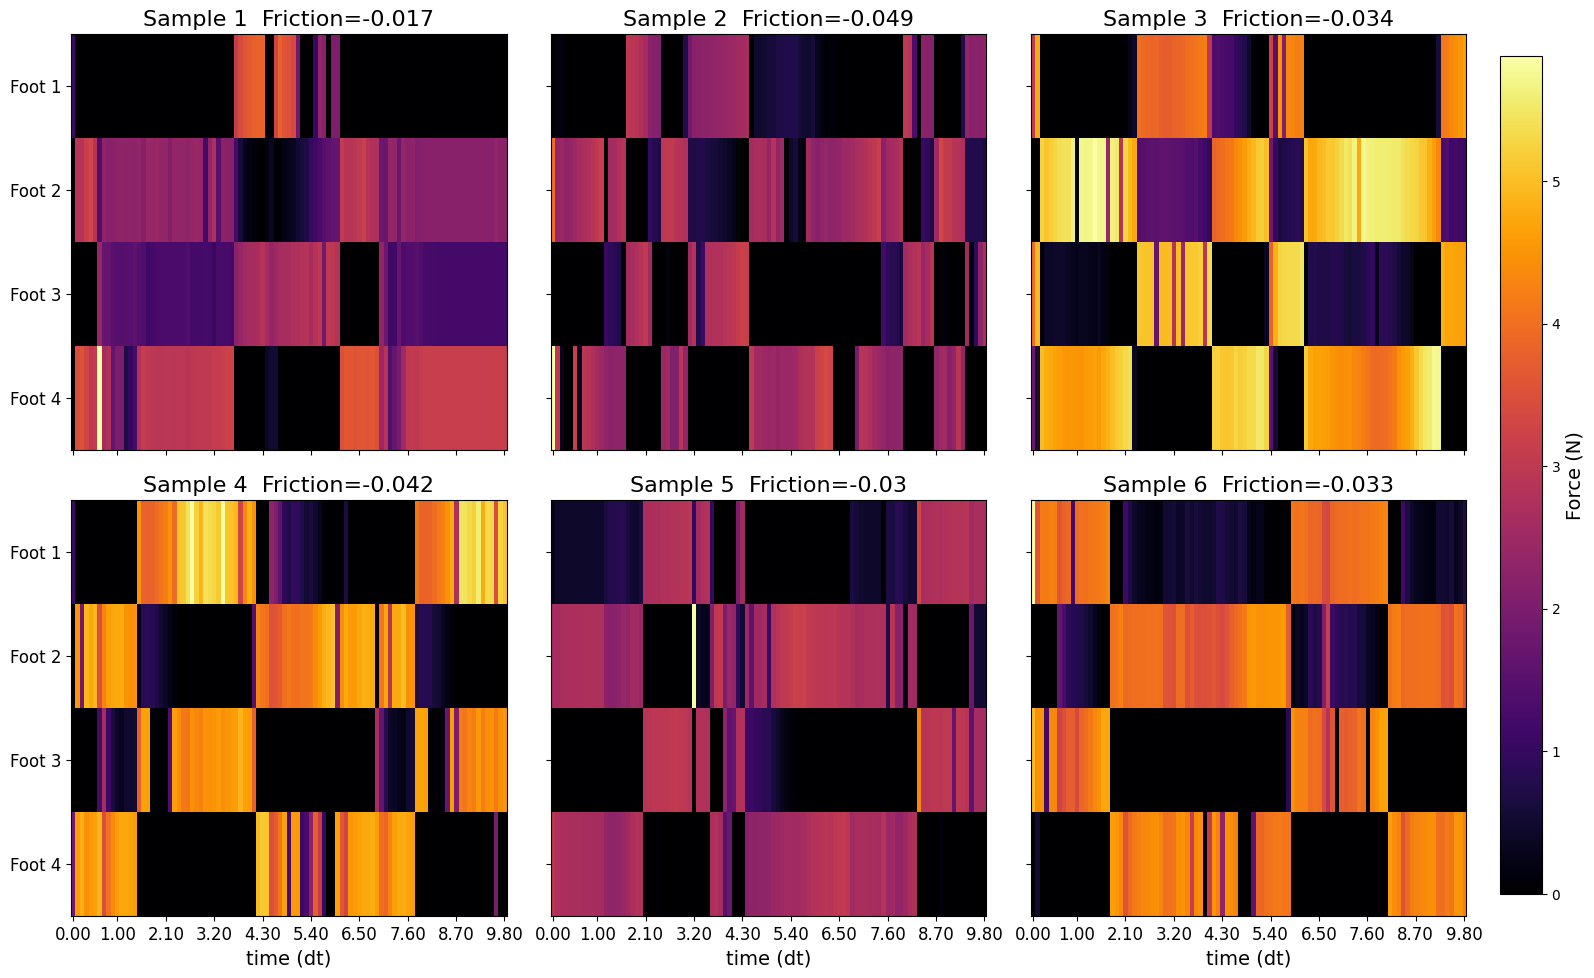

In [5]:
samples = signals[random_indicies, :, 15:15+4]

num_samples, timesteps, num_motors = samples.shape

# Convert timestep index → actual time
time = np.arange(timesteps) * dt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx in range(num_samples):

    ax = axes.flatten()[idx]
    im = ax.imshow(samples[idx].T, aspect='auto', cmap="inferno")

    ax.set_title(f"Sample {idx+1}  Friction={round(signals[idx,0,-1],3)}", fontsize=16)

    row = idx // 3
    col = idx % 3

    # ---- Y-axis (feet) ----
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(["Foot 1", "Foot 2", "Foot 3", "Foot 4"], fontsize=12)
    if col != 0:
        ax.tick_params(labelleft=False)

    # ---- X-axis (time) ----
    # Choose ~10 ticks for readability
    num_ticks = 10
    tick_positions = np.linspace(0, timesteps - 1, num_ticks).astype(int)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([f"{time[t]:.2f}" for t in tick_positions], fontsize=12)

    if row == 1:
        ax.set_xlabel("time (dt)", fontsize=14)
    else:
        ax.tick_params(labelbottom=False)

plt.tight_layout(pad=1.5)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95, pad=0.02)
cbar.set_label("Force (N)", fontsize=14)

plt.savefig("/its/home/drs25/Quadruped/assets/plots/tactile_sample.png",
            bbox_inches='tight')

plt.show()


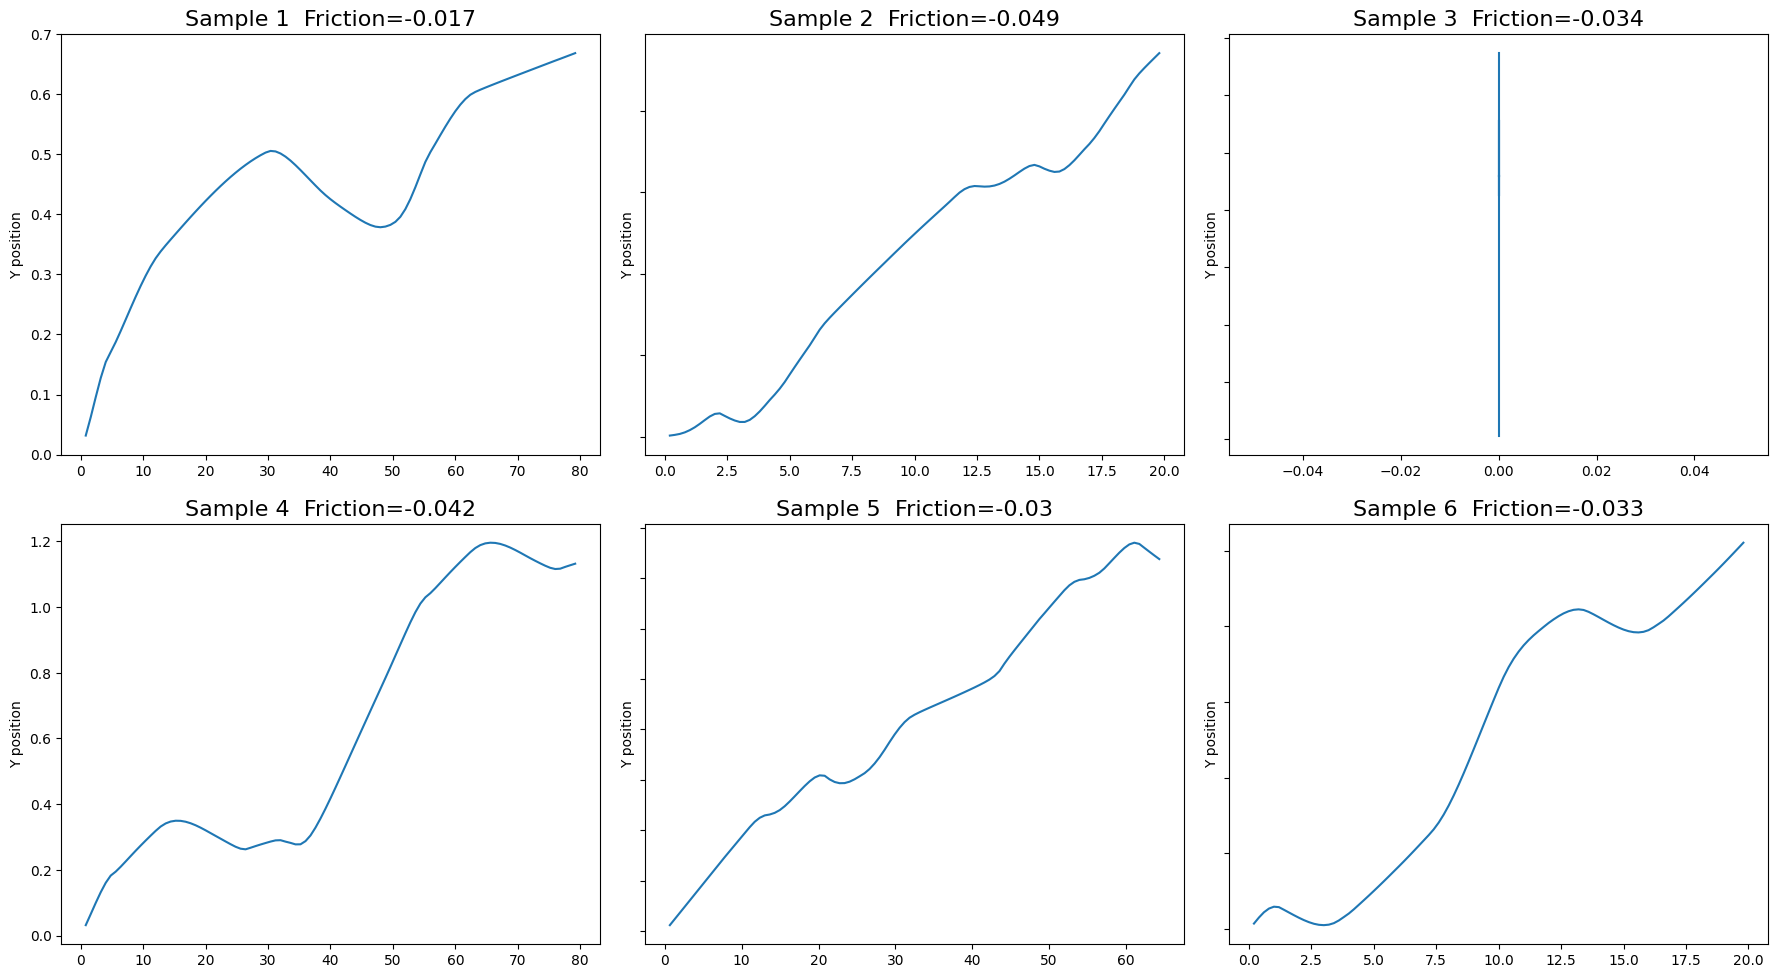

In [6]:
samples = signals[random_indicies, :, 19:19+3]
num_samples, timesteps, num_motors = samples.shape

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx in range(num_samples):
    traj=[]
    start_point=np.array([0,0,0],dtype=np.float64)
    for i in range(len(samples[idx])):
        start_point+=np.array(samples[idx][i],dtype=np.float64)
        traj.append(start_point.copy())
    traj=np.array(traj)[:,:-1]
    ax = axes.flatten()[idx]
    im = ax.plot(traj[:,0],traj[:,1])
    
    ax.set_title(f"Sample {idx+1}  Friction={round(signals[idx,0,-1],3)}", fontsize=16)
    #ax.set_aspect('equal', 'box')
    row = idx // 3
    col = idx % 3

    # ---- Y-axis (feet) ----
    ax.set_ylabel("Y position")
    if col != 0:
        ax.tick_params(labelleft=False)


plt.tight_layout(pad=1.5)

plt.savefig("/its/home/drs25/Quadruped/assets/plots/traj_sample.pdf",
            bbox_inches='tight')

plt.show()


### Fourier

(6, 99, 12) (50,) (6, 50, 12)


/its/home/drs25/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/its/home/drs25/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


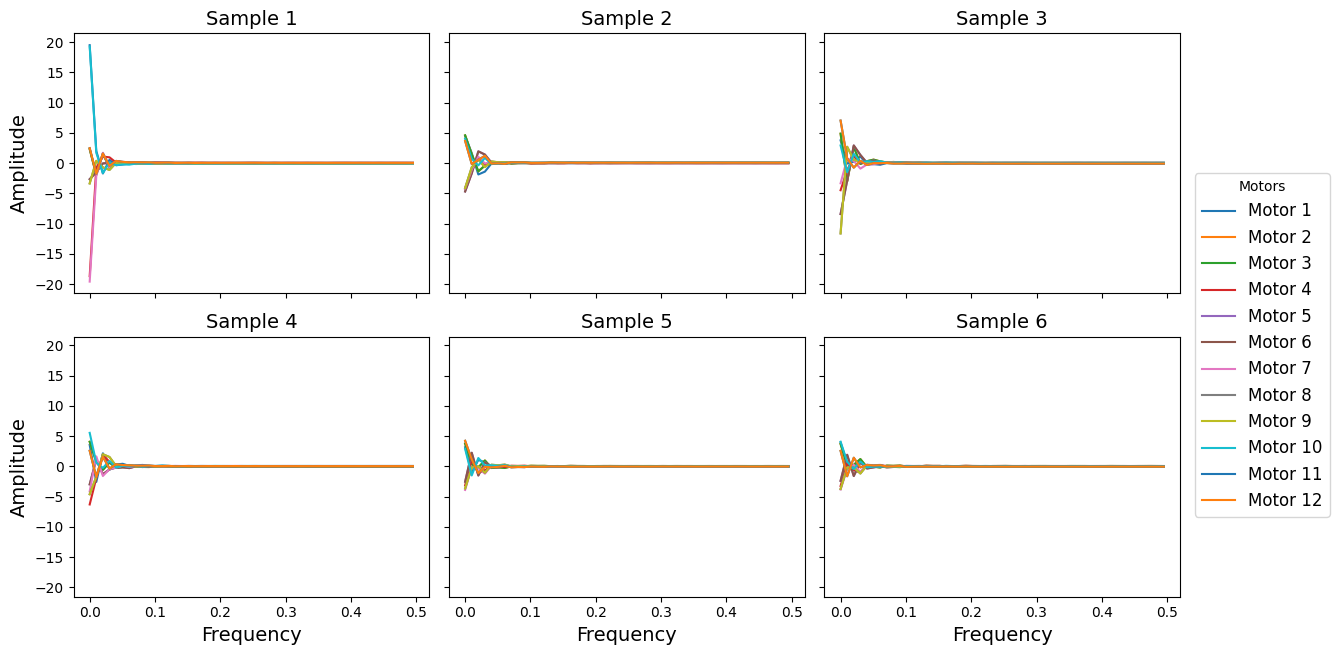

In [18]:
samples=signals[random_indicies,:,:12]
fft_vals = np.fft.rfft(samples, axis=1)
mean=np.mean(fft_vals)
std=np.std(fft_vals)
fft_vals = (fft_vals - mean) / std
freqs = np.fft.rfftfreq(samples.shape[1], d=1)
print(samples.shape,freqs.shape,fft_vals.shape)
fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=True, sharey=True)

# To store line handles for legend (only need to collect once)
legend_handles = []

for idx in range(num_samples):
    ax = axes.flatten()[idx]

    # Plot all 12 motors
    for m in range(num_motors):
        line, = ax.plot(freqs, fft_vals[idx, :, m], label=f"Motor {m+1}")

        # Save handles from the first subplot only
        if idx == 0:
            legend_handles.append(line)

    ax.set_title(f"Sample {idx+1}",fontsize=14)

    row = idx // 3
    col = idx % 3

    # Y labels only for left column
    if col == 0:
        ax.set_ylabel("Amplitude",fontsize=14)
    else:
        ax.tick_params(labelleft=False)

    # X labels only for bottom row
    if row == 1:
        ax.set_xlabel("Frequency",fontsize=14)
    else:
        ax.tick_params(labelbottom=False)

# Add legend to the right of the whole figure
fig.legend(
    handles=legend_handles,
    labels=[f"Motor {i+1}" for i in range(num_motors)],
    loc="center left",
    bbox_to_anchor=(0.85, 0.5),
    borderaxespad=0.0,
    title="Motors",fontsize=12
)

plt.tight_layout(rect=[0.05, 0.05, 0.85, 1])  # leave space for legend
plt.savefig("/its/home/drs25/Quadruped/assets/plots/fourier_sample.pdf")
plt.show()

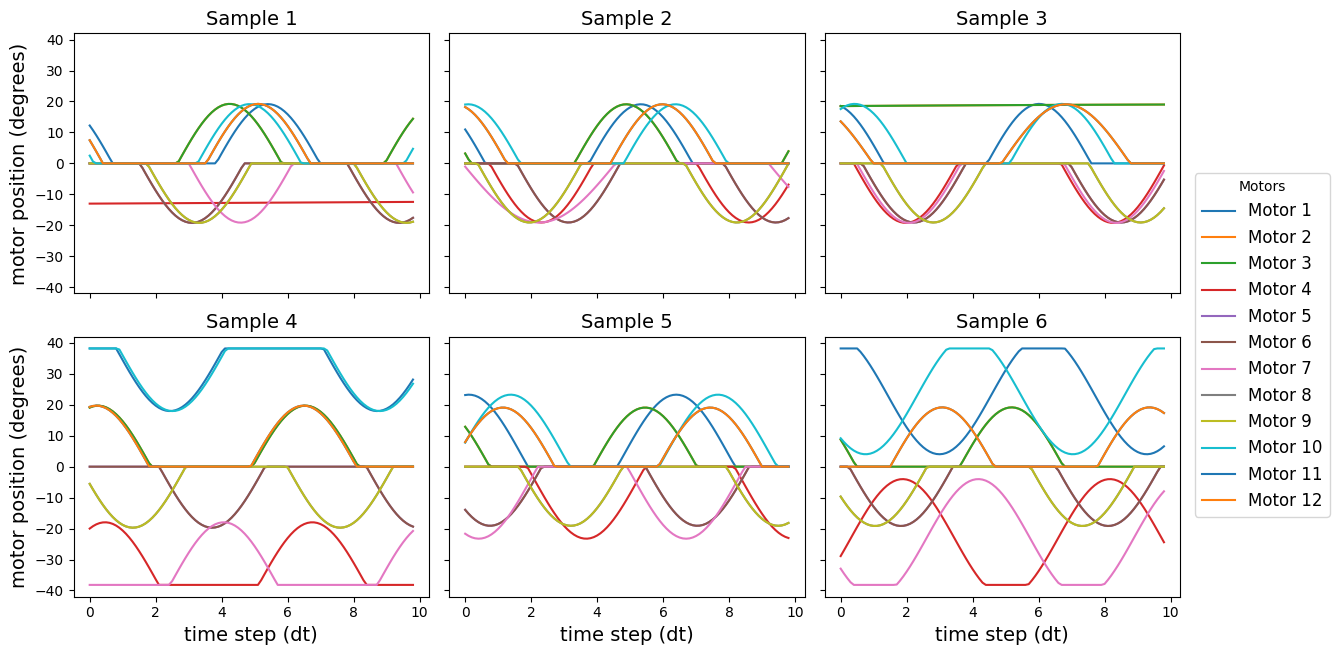

In [8]:
fft_vals=(fft_vals *std) + mean
samples = np.fft.irfft(fft_vals, n=samples.shape[1], axis=1)
num_samples, timesteps, num_motors = samples.shape

time = np.arange(timesteps) * dt

fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=True, sharey=True)

# To store line handles for legend (only need to collect once)
legend_handles = []

for idx in range(num_samples):
    ax = axes.flatten()[idx]

    # Plot all 12 motors
    for m in range(num_motors):
        line, = ax.plot(time, samples[idx, :, m], label=f"Motor {m+1}")

        # Save handles from the first subplot only
        if idx == 0:
            legend_handles.append(line)

    ax.set_title(f"Sample {idx+1}",fontsize=14)

    row = idx // 3
    col = idx % 3

    # Y labels only for left column
    if col == 0:
        ax.set_ylabel("motor position (degrees)",fontsize=14)
    else:
        ax.tick_params(labelleft=False)

    # X labels only for bottom row
    if row == 1:
        ax.set_xlabel("time step (dt)",fontsize=14)
    else:
        ax.tick_params(labelbottom=False)

# Add legend to the right of the whole figure
fig.legend(
    handles=legend_handles,
    labels=[f"Motor {i+1}" for i in range(num_motors)],
    loc="center left",
    bbox_to_anchor=(0.85, 0.5),
    borderaxespad=0.0,
    title="Motors",fontsize=12
)

plt.tight_layout(rect=[0.05, 0.05, 0.85, 1])  # leave space for legend
plt.savefig("/its/home/drs25/Quadruped/assets/plots/reconstruct_sample.pdf")
plt.show()

## extract straight lines

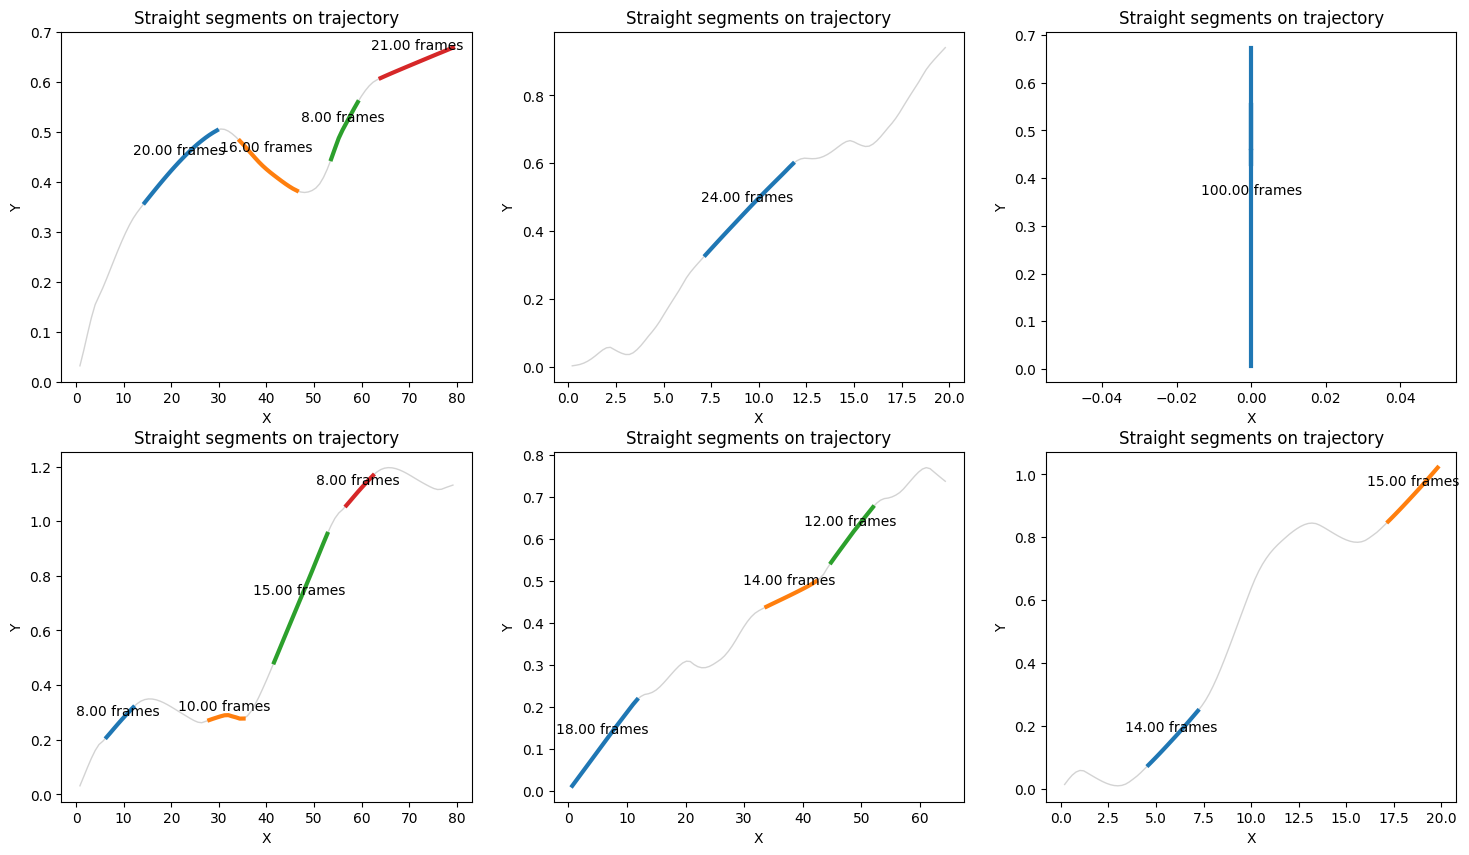

In [28]:
import numpy as np
from scipy.signal import medfilt
from itertools import groupby
samples = signals[random_indicies, :, 19:19+3]
def straight_segments_from_diffs(dx, dy, dt=None,
                                 ang_vel_thresh=0.05,   # rad/s, tune for your data
                                 smooth_kern=7,         # odd integer for median filter on headings
                                 min_len=10,            # min number of *points* in a segment
                                 close_gaps=2):         # merge segments separated by <= this many steps
    """
    Identify straight segments from per-step differences dx, dy.
    Inputs:
      dx, dy : 1D arrays of length N_steps (differences between consecutive positions)
               If you have positions p[0..M-1], then dx = np.diff(x) length M-1.
      dt     : single scalar (constant timestep) or array of length N_steps (per-step dt).
               If None, dt assumed = 1 for all steps.
    Returns:
      segments : list of (start_pt_idx, end_pt_idx, mean_angle_radians)
                 start_pt_idx and end_pt_idx are indices into the original *points*.
                 If dx,dy length = M-1, points are 0..M-1. A run of headings i..j maps to points i..j+1.
      straight_mask_points : boolean array length M (points) where True means point belongs to a straight region.
      straight_mask_steps  : boolean array length N_steps where True means that step (i -> i+1) is straight.
    """
    dx = np.asarray(dx)
    dy = np.asarray(dy)
    n_steps = len(dx)            # number of steps
    if n_steps == 0:
        return [], np.array([], dtype=bool), np.array([], dtype=bool)

    # dt handling: make array of length n_steps-1 for angular velocity denominator later
    if dt is None:
        dt_steps = np.ones(max(1, n_steps-1))
    else:
        if np.isscalar(dt):
            dt_steps = np.full(max(1, n_steps-1), float(dt))
        else:
            dt = np.asarray(dt)
            if len(dt) == n_steps:
                # we need dt between headings differences -> use dt[1:] or average adjacent? simpler: use dt[:-1] for diff
                dt_steps = (dt[:-1] + dt[1:]) / 2.0 if len(dt) > 1 else np.array([dt[0]])
            elif len(dt) == n_steps - 1:
                dt_steps = dt
            else:
                raise ValueError("dt must be scalar or length n_steps or n_steps-1")

    # 1) headings per step (length n_steps)
    headings = np.arctan2(dy, dx)   # values in (-pi, pi]

    # 2) optional smoothing (median)
    if smooth_kern is not None and smooth_kern > 1 and smooth_kern % 2 == 1 and len(headings) >= smooth_kern:
        headings_s = medfilt(headings, kernel_size=smooth_kern)
    else:
        headings_s = headings.copy()

    # 3) unwrap headings to avoid ±pi jump
    headings_un = np.unwrap(headings_s)

    # 4) angular velocity (length n_steps-1)
    if n_steps >= 2:
        ang_vel = np.diff(headings_un) / dt_steps  # length n_steps-1
        ang_vel_mag = np.abs(ang_vel)
    else:
        ang_vel = np.array([])
        ang_vel_mag = np.array([])

    # 5) map ang_vel (n_steps-1) back to a per-step measure (n_steps)
    # We'll approximate angular speed at step i (heading index i) by averaging adjacent ang_vels
    ang_at_step = np.zeros(n_steps)
    if n_steps == 1:
        ang_at_step[0] = 0.0
    else:
        ang_at_step[0] = ang_vel_mag[0]
        ang_at_step[-1] = ang_vel_mag[-1]
        if len(ang_vel_mag) > 1:
            ang_at_step[1:-1] = 0.5 * (ang_vel_mag[:-1] + ang_vel_mag[1:])

    # 6) straight step mask
    straight_mask_steps = ang_at_step < ang_vel_thresh  # boolean length n_steps

    # 7) convert contiguous straight steps to point index ranges
    # A run of straight steps i..j corresponds to point indices [i .. j+1]
    segments = []
    # find contiguous True runs in straight_mask_steps
    runs = []
    start = None
    for i, val in enumerate(straight_mask_steps):
        if val and start is None:
            start = i
        elif not val and start is not None:
            runs.append((start, i-1))
            start = None
    if start is not None:
        runs.append((start, len(straight_mask_steps)-1))

    # merge small gaps: if two runs separated by <= close_gaps steps, merge them
    if close_gaps and len(runs) > 1:
        merged = []
        cur_s, cur_e = runs[0]
        for s,e in runs[1:]:
            gap = s - cur_e - 1
            if gap <= close_gaps:
                cur_e = e
            else:
                merged.append((cur_s, cur_e))
                cur_s, cur_e = s, e
        merged.append((cur_s, cur_e))
        runs = merged

    # keep only runs long enough in terms of points
    for s_step, e_step in runs:
        start_pt = s_step
        end_pt = e_step + 1
        n_points = end_pt - start_pt + 1
        if n_points >= min_len:
            # mean heading in original (wrapped) sense — use vector mean to handle circular mean
            seg_headings = headings_s[s_step:e_step+1]
            mean_angle = np.arctan2(np.mean(np.sin(seg_headings)), np.mean(np.cos(seg_headings)))
            segments.append((start_pt, end_pt, mean_angle))

    # build point-level mask of which points belong to any accepted segment
    # points count = n_steps + 1
    n_points_total = n_steps + 1
    straight_mask_points = np.zeros(n_points_total, dtype=bool)
    for (sp, ep, _) in segments:
        # clamp
        sp = max(0, sp)
        ep = min(n_points_total-1, ep)
        straight_mask_points[sp:ep+1] = True

    return segments, straight_mask_points, straight_mask_steps
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx in range(num_samples):
    traj=[]
    change_lines=[]
    dx=samples[idx][:,0]
    dy=samples[idx][:,1]

    segments, mask_points, mask_steps = straight_segments_from_diffs(dx, dy, dt=0.02,
                                                                ang_vel_thresh=0.05,
                                                                smooth_kern=7,
                                                                min_len=8,
                                                                close_gaps=2)
    traj=[]
    start_point=np.array([0,0,0],dtype=np.float64)
    for i in range(len(samples[idx])):
        start_point+=np.array(samples[idx][i],dtype=np.float64)
        traj.append(start_point.copy())
    traj=np.array(traj)[:,:-1]
    x=traj[:,0]
    y=traj[:,1]
    ax = axes.flatten()[idx]
    ax.plot(x, y, color='lightgrey', linewidth=1, label="Full trajectory")
    for (start, end, angle) in segments:
        ax.plot(x[start:end+1], y[start:end+1], linewidth=3)
        seg_time = end+1 - start
        xm = (x[start] + x[end-1]) / 2
        ym = (y[start] + y[end-1]) / 2
        offset = 0.02  # tune based on your scale
        ax.text(xm, ym + offset,
                f"{seg_time:.2f} frames",
                ha='center', va='bottom', fontsize=10)
    #ax.axis('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Straight segments on trajectory")
plt.show()

## represetnation

[41.4239191  41.4285584  41.43352432 41.42839229] [ 57 119 182 245]


/tmp/ipykernel_3361170/1904628343.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


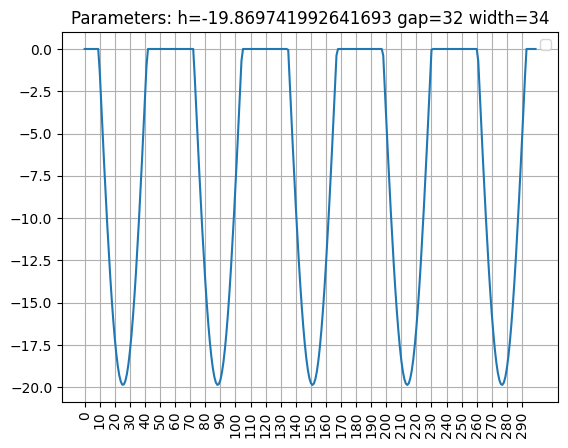

In [17]:
# split the waves into simple representations
from scipy.signal import find_peaks

samples=signals[random_indicies,:,:12]
sample=samples[np.random.randint(0,len(samples)),:300,np.random.randint(0,12)]
a=np.min(sample)
b=np.max(sample)
med=np.median(sample)
di = 1 if abs(abs(med)-abs(a)) < abs(abs(med)-abs(b)) else -1 #if the median is closer to one it is the base
h = abs(abs(a)-abs(b))

inds=np.where(sample==a)[0] if di==1 else np.where(sample==b)[0]
peak_points=[int(f) for f in inds]
plt.plot(sample)
#plt.plot([med for i in range(300)],c="r")
#plt.plot([a for i in range(300)],"--",label="peak" if di==1 else "base")
#plt.plot([b for i in range(300)],"--",label="peak" if di==-1 else "base")
if di==1: #gather where there are peaks
    base=np.where(sample>a)[0]
    wid=np.where(sample<=a)[0]
else:
    base=np.where(sample<b)[0]
    wid=np.where(sample>=b)[0]
level=sample[wid[0]]
gap=np.max(np.diff(base))
w=np.max(np.diff(wid))
peaks, props = find_peaks(sample, width=True)

left_edges  = props["left_ips"]   # float positions where peak begins
right_edges = props["right_ips"]  # float positions where peak ends
widths      = props["widths"]     # width (right-left)
dist=np.diff(peaks)
print(widths,peaks)

#for i in range(len(peak_points)):
    #plt.plot([peak_points[i] for k in range(int(min(a,b)),int(max(a,b)))],[k for k in range(int(min(a,b)),int(max(a,b)))],"--")
plt.title("Parameters: h="+str(h*di)+" gap="+str(gap)+" width="+str(w))
plt.legend()
plt.grid()
plt.xticks([i for i in range(0,300,10)],[i for i in range(0,300,10)],rotation=90)
plt.show()

0 0.0 1
19.115631533951372 32.5 30.166666666666664 0.0 49


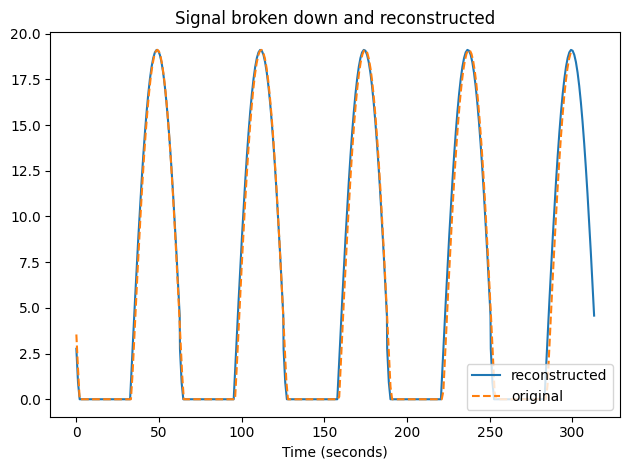

In [69]:
from scipy.signal import find_peaks
from scipy import stats
def segment(val): #segment the values of the base or width based on differences
    d=np.diff(val)
    segments=[]
    start = val[0]
    for i in range(1, len(val)):
        if d[i-1] != 1:
            # end of a segment
            segments.append((start, val[i-1]))
            start = val[i]
    segments.append((start, val[-1]))
    gaps = []
    for i in range(1, len(segments)):
        prev_end = segments[i-1][1]
        next_start = segments[i][0]
        gaps.append(next_start - prev_end)
    max_gap = max(gaps)
    return max_gap
def breakdown(sample): #break down the wave characteristics 
    a=np.min(sample)
    b=np.max(sample)
    med= stats.mode(sample.astype(np.uint8), keepdims=False).mode
    di = 1 if abs(abs(med)-abs(a)) < abs(abs(med)-abs(b)) else -1 #if the median is closer to one it is the base
    h = abs(abs(a)-abs(b))
    print(med,np.median(sample),di)
    if di==1: #gather where there are peaks
        base=np.where(sample>a)[0] #gather all values that are in the peak
        wid=np.where(sample<=a)[0] #gather all values that are in the base
    else: #if the wave goes down and not up
        base=np.where(sample<b)[0] #gather all values that are in the peak
        wid=np.where(sample>=b)[0] #gather all values that are in the base
    level=sample[wid[0]]
    peaks, props = find_peaks(np.abs(sample-level), width=True, rel_height=1.0) #it is important to 
    widths = props["widths"]     # width (right-left)
    gap=np.average(widths)
    dist=np.average(np.diff(peaks))
    wid=dist-gap
    #gap=segment(base)
    #wid=segment(wid)
    return h*di,gap,wid,level,peaks[0]
def reform(height, gap, width, level, start, repeat=1):
    #rising/peak part sampled at integer indices
    x1 = np.arange(start,start+gap)
    y1 = height * np.sin((np.pi / gap) * (x1 - start))
    x2 = np.arange(start+gap, start+gap+width)#flat base part
    y2 = np.ones_like(x2) * level
    x = np.concatenate((x1, x2))#one full cycle
    y = np.concatenate((y1+level, y2))
    cycles = []#repeat cycles exactly
    ys = []
    for i in range(repeat):
        offset = i * (gap + width)
        cycles.append(x + offset)
        ys.append(y)
    x = np.concatenate(cycles)
    y = np.concatenate(ys)
    # shift so first peak is at index "start"
    peaks, _ = find_peaks(np.abs(y-level))
    shift = peaks[0] - start #find difference between our generated signal
    x-=start
    y = np.roll(y, -shift) #roll it round so it alignes with the start position
    return x, y
random_indicies=[np.random.randint(0,len(signals)-1) for i in range(6)]
samples=signals[random_indicies,:,:12]
sample=samples[np.random.randint(0,len(samples)),:300,np.random.randint(0,12)]
h,gap,wid,level,start=breakdown(sample)
print(h,gap,wid,level,start)
x,y=reform(h,gap,wid,level,start,repeat=5)
plt.plot(x,y,label="reconstructed")
plt.plot(np.arange(0,len(sample)),sample,"--",label="original")
plt.legend(loc="lower right")
plt.title("Signal broken down and reconstructed")
#plt.xticks([i for i in range(0,len(x),50)],[i/10 for i in range(0,len(x),50)])
plt.xlabel("Time (seconds)")
plt.tight_layout()
plt.savefig("/its/home/drs25/Quadruped/assets/plots/motors_reconstructed.pdf")
plt.show()

In [52]:
print(random_indicies,)

[29, 39, 27, 5, 37, 3]
